 ## HW4 - EuroSAT Land Use and Land Cover Classification using Deep Learning
 
In this homework your task is to implement deep learning models to solve a typical problem in satellite imaging  using a benchmark dataset. The homework was designed to make you work on increasingly more complex models. We hope that the homework will be very helpful to improve your skills and knowledge in deep learning!


### S1:

- Visit the EuroSAT data description page and download the data: https://github.com/phelber/eurosat

- Split the data into training (50%) and testing sets (50%), stratified on class labels (equal percentage of each class type in train and test sets).

- Convert each RGB image to grayscale and flatten the images into a data matrix (n x p: n = #samples, p = #pixels in each image)


C:\Users\nelms\AppData\Local\Temp\ipykernel_15640\572818545.py:4: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  [polygons.extend(list(multipolys)) for multipolys in districts['geometry'].values]
C:\Users\nelms\AppData\Local\Temp\ipykernel_15640\572818545.py:4: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  [polygons.extend(list(multipolys)) for multipolys in districts['geometry'].values]


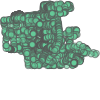

In [19]:
import geopandas as gpd

# GEODATAFRAME THAT WILL BE POINTS
# "RIVERS TO COMPARE AGAINST"
path = r"C:\Users\nelms\Documents\Penn\CPLN-680\Permit_Metrics\data\raw\sf_holc1937_districts.geojson"
districts = gpd.read_file(path)

# MULTIPOINT FUNCTION
from shapely.geometry import MultiPoint

# GET ONE LARGE LIST OF POLYGONS
polygons = []

[
    # EXTEND LIST OF POLYGONS
    polygons.extend(
        # TURN MULTIPOLYGON GEOMETRY TO LIST OF SINGLE POLYGONS
        list(multipolys)
        ) 
    # CYCLE THROUGH THE DISTRICT GEOMETRIES
    for multipolys in districts['geometry'].values
    ]

# GET ONE LARGE LIST OF POINTS
points = []

[   
    # EXTEND POINT LIST
    points.extend(
        # GET LIST OF POINTS FROM THE EXTERIOR OF EACH POLYGON
        list(polygon.exterior.coords)
        ) 
    for polygon in polygons
]
# GEOMETRY OF MULTIPLE POINTS
multipoints = MultiPoint(points)

# MAIN COMPARISION POLYGONS
path = r"C:\Users\nelms\Documents\Penn\CPLN-680\Permit_Metrics\data\raw\bayarea_rentdata_censusblock.json"
blocks = gpd.read_file(path).to_crs(districts.crs)

# FIND NEAREST POINTS FUNCTION
from shapely.ops import nearest_points

# GET NEW COLUMN OF NEAREST DISTANCE
blocks['distance_to_districts'] = blocks.geometry.apply(
    # CYCLE THROUGH EACH GEOMETRY
    lambda geom: 
    # FIND DISTANCE BETWEEN GEOM AND NEAREST POINT
    geom.distance(
        # FIND NEAREST POINT
        nearest_points(multipoints, geom)[0]
        )
    )

In [27]:
from shapely.ops import nearest_points

blocks['distance_to_districts'] = blocks.geometry.apply(
    lambda polygon: 
    polygon.distance(nearest_points(multipoints, polygon)[0])
    )

<AxesSubplot:>

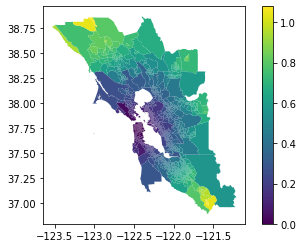

In [30]:
blocks.plot(column='distance_to_districts', legend=True)

### S2:

- Implement a first deep learning model (M.1) using a fully connected network with a single fully connected layer (i.e: input layer + fully connected layer as the output layer). 

Q2.1: Calculate classification accuracy on the test data.  

,name,holc_id,holc_grade,area_description_data,geometry
0,None,A1,A,{'1': 'This area consists of 35 irregularly-sh...,"MULTIPOLYGON (((-122.47554 37.78687, -122.4755..."
1,None,A10,A,{'1': 'This area of 25 irregularly-shaped bloc...,"MULTIPOLYGON (((-122.46089 37.73566, -122.4610..."
2,None,A11,A,"{'1': 'This area, with the exception of the tw...","MULTIPOLYGON (((-122.45619 37.74046, -122.4565..."
3,None,A12,A,"{'1': 'This area, consisting of some 20 blocks...","MULTIPOLYGON (((-122.47154 37.73326, -122.4665..."
4,None,A13,A,{'1': 'This area of some 25 irregularly-shaped...,"MULTIPOLYGON (((-122.46102 37.73572, -122.4608..."
...,...,...,...,...,...
92,None,D7,D,{'1': 'This area consists of approximately 35 ...,"MULTIPOLYGON (((-122.43238 37.73492, -122.4323..."
93,None,D8,D,{'1': 'This area of some 60 blocks which are 9...,"MULTIPOLYGON (((-122.42315 37.74221, -122.4235..."
94,None,D9,D,{'1': 'This area of 36 blocks occupies a fairl...,"MULTIPOLYGON (((-122.42871 37.73228, -122.4302..."
95,None,None,C,{'': ''},"MULTIPOLYGON (((-122.47350 37.72729, -122.4746..."


### S3:

- Implement a second deep learning model (M.2) adding an additional fully connected hidden layer (with an arbitrary number of nodes) to the previous model. 

Q3.1: Calculate classification accuracy on the test data.  

### S4:

- Implement a third deep learning model (M.3) adding two additional fully connected hidden layers (with arbitrary number of nodes) for a total of four, as well as drop-out layers to the previous model. 

Q4.1: Calculate classification accuracy on the test data.

Q4.2: Compare against previous models. Which model was the "best"? Why?

### S5:

- Take the original RGB images and do not vectorize them. Use these images as the data input for the following models (M.4 and M.5).
- Implement a fourth CNN model (M.4) that includes the following layers: Conv2D, MaxPooling2D, Dropout, Flatten, Dense. 

Q5.1: Calculate classification accuracy on the test data.

Q5.2: Compare against previous models. Which model was the "best"? Why?

### S6:

- Using RGB images from S5, implement a fifth deep learning model (M.5) targeting accuracy that will outperform all previous models. You are free to use any tools and techniques, as well as pre-trained models for transfer learning. 

Q6.1: Describe the model you built, and why you chose it.

Q6.2: Calculate classification accuracy on the test data.

Q6.3: Compare against previous models. Which model was the "best"? Why?

Q6.4: What are the two classes with the highest labeling error? Explain using data and showing mis-classified examples.

### S7:

- Apply your best model on multispectral images. You may use whichever image channels you wish, so long as you use more than just RGB (although you are not required to use any color channels).

Q7.1: Calculate classification accuracy on the test data.

Q7.2: Compare against results using RGB images.